In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

Building our Model To train the data

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

Preparing our data using data generator

In [16]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "D:/Code/PythonProjects/EmotionDetection/archive/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [17]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "D:/Code/PythonProjects/EmotionDetection/archive/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


Visualizaing the data that is fed to train data gen

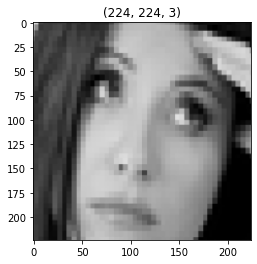

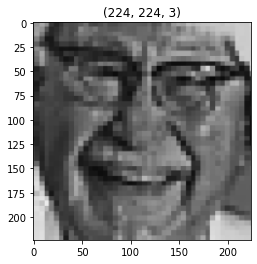

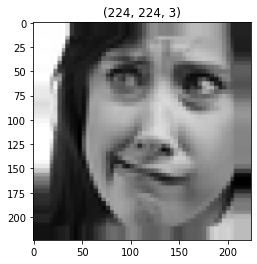

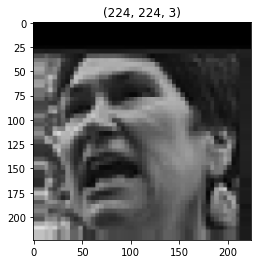

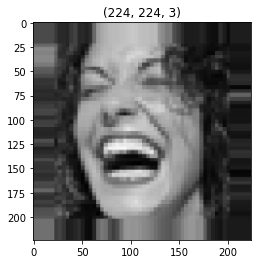

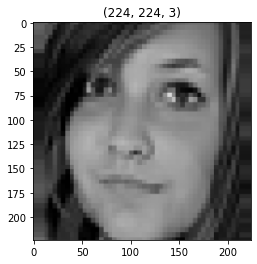

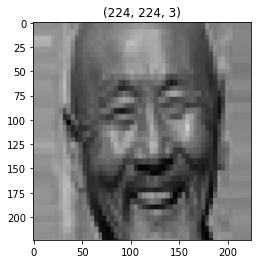

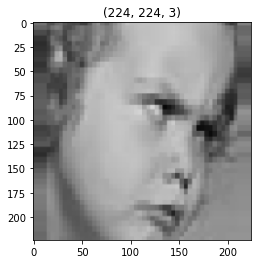

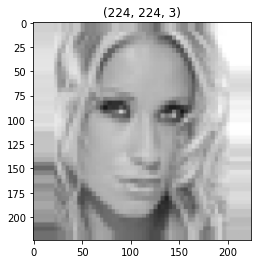

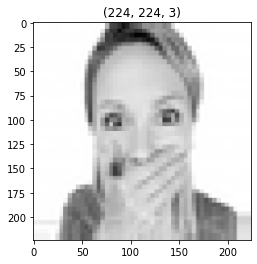

In [18]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

Having early stopping and model check point

In [27]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 10, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [28]:
hist = model.fit(          train_data, 
                           steps_per_epoch= 10, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 5.1153 - accuracy: 0.4406
Epoch 00001: val_accuracy improved from -inf to 0.42578, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 5.1153 - accuracy: 0.4406 - val_loss: 6.1232 - val_accuracy: 0.4258
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 5.0899 - accuracy: 0.4469
Epoch 00002: val_accuracy improved from 0.42578 to 0.49609, saving model to best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 5.0899 - accuracy: 0.4469 - val_loss: 5.1149 - val_accuracy: 0.4961
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 5.0426 - accuracy: 0.4031
Epoch 00003: val_accuracy did not improve from 0.49609
10/10 [==============================] - 13s 1s/step - loss: 5.0426 - accuracy: 0.4031 - val_loss: 3.9847 - val_accuracy: 0.4609
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 5.6597 - accuracy: 0.4031
Epoch

In [29]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("D:/Code/PythonProjects/EmotionDetection/best_model.h5")

In [30]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

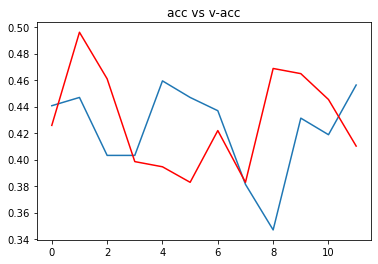

In [31]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

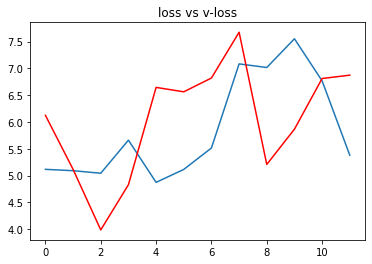

In [32]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [33]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of happy


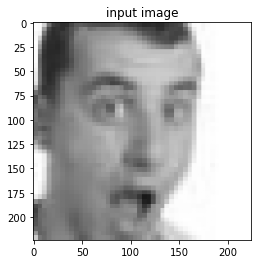

In [38]:
# path for the image to see if it predics correct class

#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/angry/im51.png"
#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/disgusted/im2.png"
#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/fearful/im52.png"
#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/happy/im5.png"
#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/neutral/im5.png"
#path = "D:/Code/PythonProjects/EmotionDetection/archive/test/sad/im52.png"
path = "D:/Code/PythonProjects/EmotionDetection/archive/test/surprised/im5.png"

img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()